## Box-Cox transformation

- Is a generalization of the power family of transformations

$$
x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^{\lambda} - 1}{\lambda}, & \text{if } \lambda \neq 0, \\
\ln(x_i), & \text{if } \lambda = 0
\end{cases}
$$

- Only suitable for positive variables.

- When variables are not strictly positive:
    - Add a constant
    - Use Yeo-Johnson


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer


In [16]:
# Func to make histograms
def make_histogram(df):
    df.hist(bins=30, figsize=(12,12), layout=(3,3))
    plt.show()

In [9]:
# Func to make Q-Q Plots
def make_qqplot(df):
    plt.figure(figsize=(10,6), constrained_layout=True)
    variables = list(df.columns)
    for i in range(len(variables)):
        ax = plt.subplot(2, 3, i+1)
        var = variables[i]

        #q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        ax.set_title(var)

    plt.show()

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


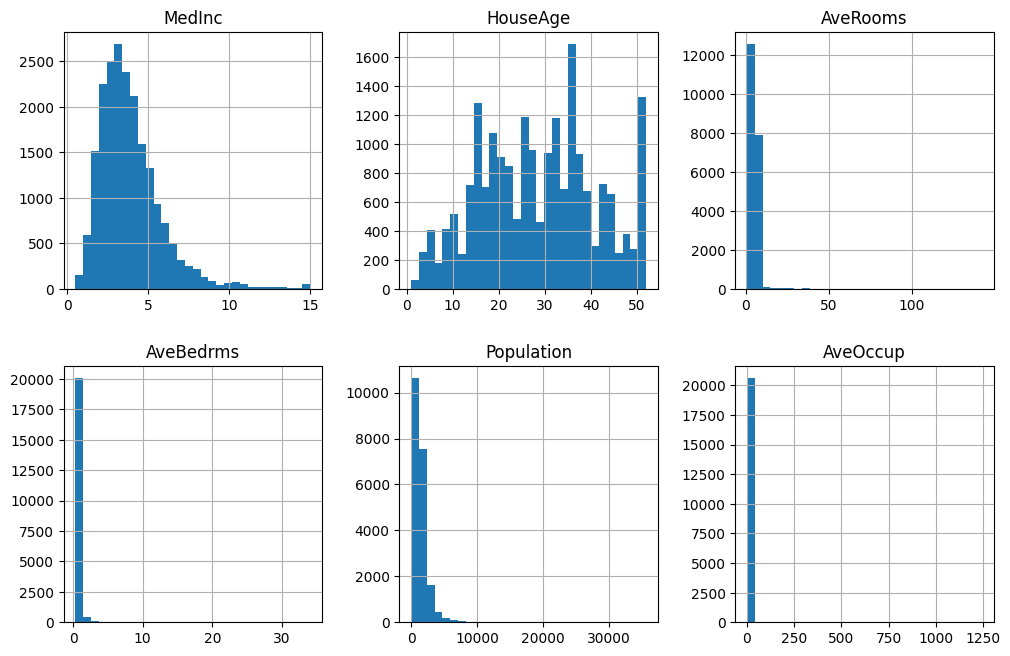

In [17]:
# Inspect the variable distributions
make_histogram(X)

In [8]:
variables = list(X.columns)
variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

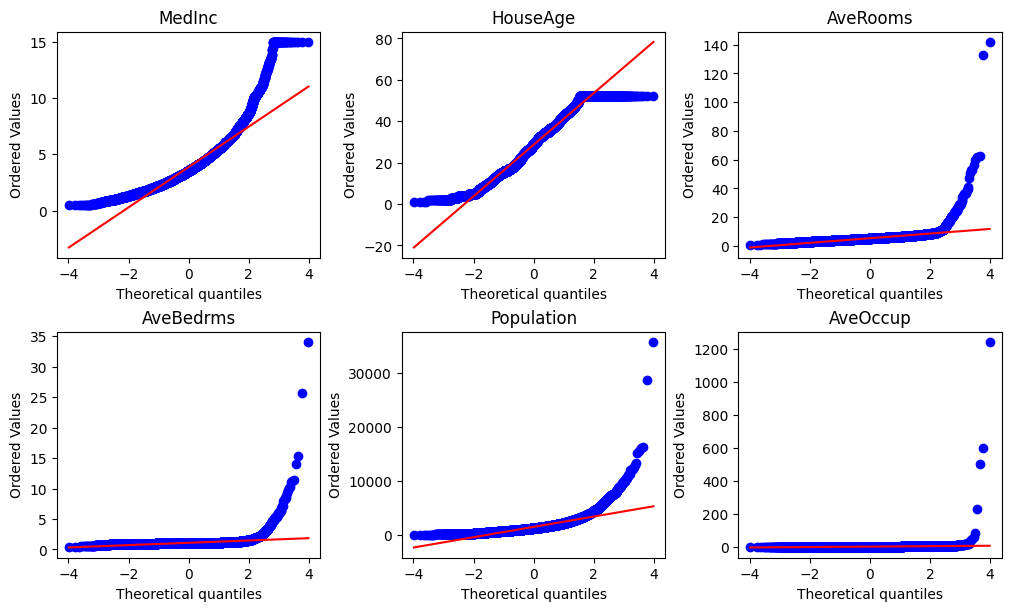

In [10]:
make_qqplot(X)

In [11]:
# initialize box-cox transformer

transformer = PowerTransformer(method="box-cox", standardize=False)
transformer.set_output(transform="pandas")

,method,'box-cox'
,standardize,False
,copy,True


In [12]:
# fit the transformer to learn the lamdas
transformer.fit(X)

,method,'box-cox'
,standardize,False
,copy,True


In [13]:
transformer.lambdas_

array([ 0.09085446,  0.80939807, -0.29800488, -1.62900029,  0.23576756,
       -0.47630329])

In [14]:
X_tf = transformer.transform(X)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


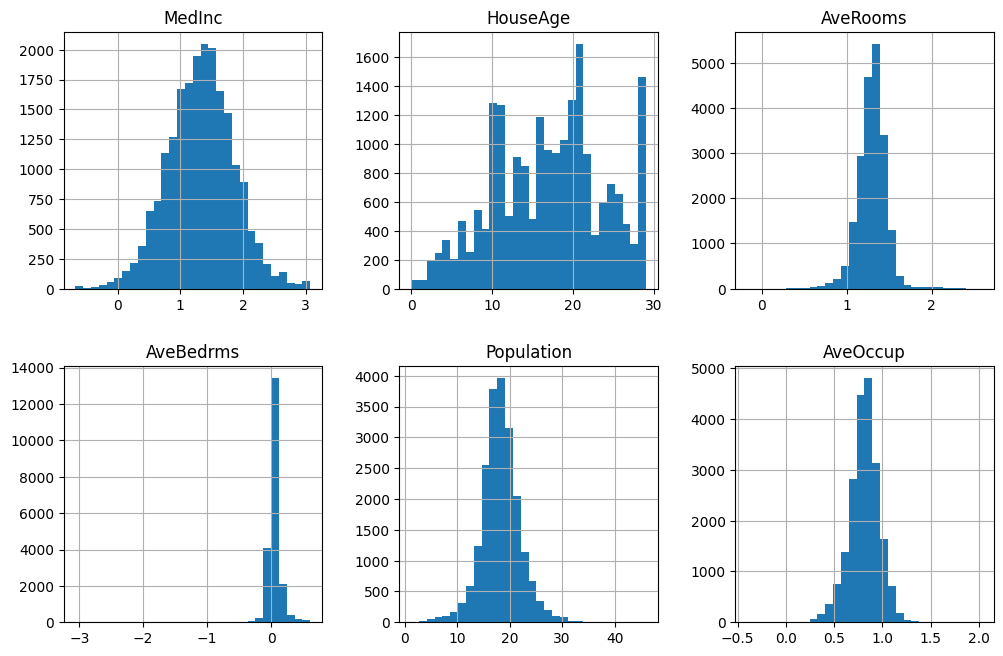

In [18]:
make_histogram(X_tf)

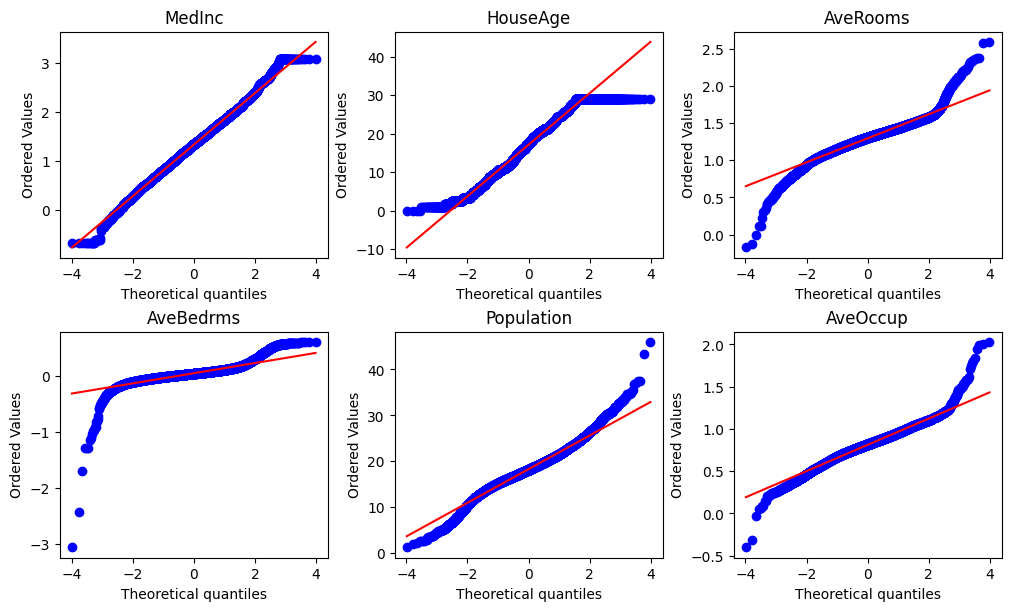

In [19]:
# check the result of transformation
make_qqplot(X_tf)